# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [1]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

<!DOCTYPE	1
PUBLIC	1
"-//IETF//DTD	1
2.0//EN">	1
<html><head>	1
<title>403	1
Forbidden</title>	1
</head><body>	1
<h1>Forbidden</h1>	1
<p>You	1
don't	1
have	1
permission	1
to	1


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [2]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

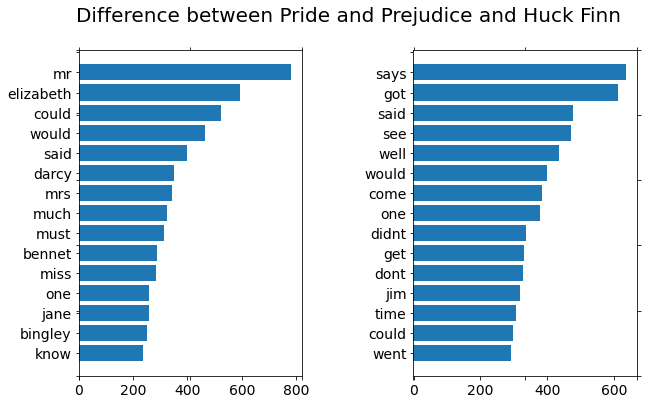

In [56]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)+1) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ]+[" "])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)+1) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ]+[" "])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

In [41]:
type(wf_ee[0])

tuple

In [ ]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [ ]:
import requests, re, nltk
#In case your text is not on Project Gutenberg but at some other URL
#http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter2.html
# that contains 12 parts
t = ""
for i in range(2,13):
  r = requests .get('http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter' + str(i) + '.html')
  t = t + r.text

In [ ]:
len(t)

In [4]:
import requests, re, nltk
import operator
import re

In [5]:
r = requests .get('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
book1 = r.text
print(len(book1))

717572


In [6]:
r = requests .get('http://www.gutenberg.org/ebooks/76.txt.utf-8')
book2 = r.text
print(len(book2))

606624


In [7]:
def dataCleaner(txt):
    txt = txt[1:]
    txt = txt.lower()
    regex = re.compile('[^a-zA-Z ]')
    txt = regex.sub('', txt)
    txt = txt.replace('  ', ' ')
    txt = txt.replace('  ', ' ')
    txt = txt.replace('  ', ' ')
    return txt


In [8]:
book1 = dataCleaner(book1)
book2 = dataCleaner(book2)

book1_arr = book1.split(' ')
book2_arr = book2.split(' ')

In [9]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english') + ['ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'','\"', '-', '}', '{', '&', '|', u'\u2014' ]

[nltk_data] Downloading package stopwords to /home/shoque/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
wf = {}
for w in book1_arr:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
for k in stop_words:
    wf. pop(k, None)
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
ml = min(len(wfs),15)
for i in range(0,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))

mr	623
could	452
would	387
elizabeth	386
said	351
darcy	306
must	280
much	280
mrs	263
bennet	244
one	227
miss	223
jane	211
know	209
bingley	206


In [16]:
wf = {}
for w in book2_arr:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
for k in stop_words:
    wf. pop(k, None)
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
ml = min(len(wfs),15)
for i in range(0,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))

got	554
see	423
said	413
would	341
come	326
one	319
get	305
didnt	294
dont	285
says	268
could	262
went	261
aint	259
time	253
warnt	249


In [80]:
# Author: Frank L. Packard
#Book 1: The Adventures of Jimmie Dale 
URL_1 = "https://www.gutenberg.org/files/1218/1218-0.txt"

#Book 2: On the Iron at Big Cloud
URL_2 = "https://www.gutenberg.org/files/54111/54111-0.txt"


# Author: Charles Murray
#Book 3: The Great Airship: A Tale of Adventure
URL_3 = "https://www.gutenberg.org/cache/epub/41176/pg41176.txt"

In [81]:
r = requests.get(URL_1)
book_1 = r.text
print(len(book_1))

931924


In [82]:
r = requests.get(URL_2)
book_2 = r.text
print(len(book_2))

532828


In [83]:
r = requests.get(URL_3)
book_3 = r.text
print(len(book_3))

524855


In [84]:
book_1 = dataCleaner(book_1)
book_2 = dataCleaner(book_2)
book_3 = dataCleaner(book_3)

book1_arr = book_1.split(' ')
book2_arr = book_2.split(' ')
book3_arr = book_3.split(' ')

In [85]:
wf = {}
for w in book1_arr:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
for k in stop_words: 
    wf. pop(k, None)
#Removing special words that are part of the title of the book
wf.pop('jimmie', None)
wf.pop('dale', None)

wf_1 = wf.copy()
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
ml = min(len(wfs),15)
for i in range(0,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))
    
book_1_words = wfs[:15].copy()

one	508
said	495
would	461
little	392
man	389
door	356
could	346
back	291
room	287
gray	247
dales	229
way	226
hand	224
know	223
like	216


In [86]:
wf = {}
for w in book2_arr:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
for k in stop_words: 
    wf. pop(k, None)

wf_2 = wf.copy()
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
ml = min(len(wfs),15)
for i in range(0,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))
book_2_words = wfs[:15].copy()

said	314
one	287
like	235
man	212
got	194
little	177
men	174
know	172
big	168
back	168
way	166
dont	165
came	163
get	159
would	148


In [73]:
book_1_words

[('one', 508),
 ('said', 495),
 ('would', 461),
 ('little', 392),
 ('man', 389),
 ('door', 356),
 ('could', 346),
 ('back', 291),
 ('room', 287),
 ('gray', 247),
 ('dales', 229),
 ('way', 226),
 ('hand', 224),
 ('know', 223),
 ('like', 216)]

# Compare word frequencies between two works of a single author.

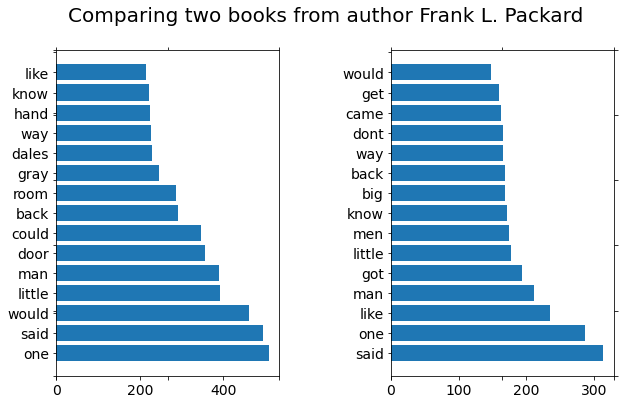

In [77]:
plotTwoLists(book_1_words, book_2_words,"Comparing two books from author Frank L. Packard")

In [87]:
wf = {}
for w in book3_arr:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
for k in stop_words: 
    wf. pop(k, None)
#Removing special words that are part of the title of the book
wf.pop('airship', None)
wf_3 = wf.copy()
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
ml = min(len(wfs),15)
for i in range(0,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))
    
book_3_words = wfs[:15].copy()

one	348
dick	286
said	221
ship	203
joe	178
mr	168
could	168
would	154
see	152
alec	147
andrew	140
upon	140
us	137
sir	119
carl	115


# Compare word frequencies between works of two authors.

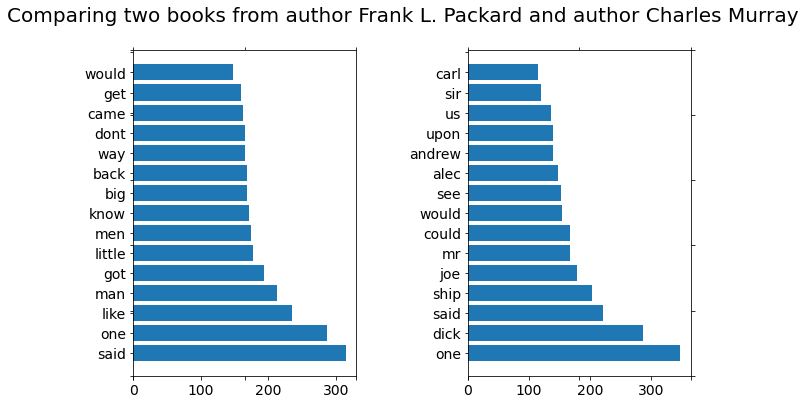

In [88]:
plotTwoLists(book_2_words, book_3_words,"Comparing two books from author Frank L. Packard and author Charles Murray")

# Are there some words preferred by one author but used less frequently by another author?

Answer: I could see some ones are commonly used by both authors on a high frequencey. But, there are some words that one author prefers over the other one. For example, author Frank L. Packard used words like "got", "like" frequently, whereas, author Charles Murray used such words less frequently.

# The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors?

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [131]:
word = "said"

total = 0
for item in wf_1:
    total += wf_1[item]

probability1 = wf_1[word]/total*100

total = 0
for item in wf_2:
    total += wf_2[item]

probability2 = wf_2[word]/total*100

total = 0
for item in wf_3:
    total += wf_3[item]

probability3 = wf_3[word]/total*100

In [132]:
print(probability1)
print(probability2)
print(probability3)

0.6473719315224358
0.7072549947068496
0.4983988092553336


Text(0.5, 1.0, 'Binomial distribution for three books\nGreen is for Book 1 by author Frank L. Packard\nRed is for Book 2 by author Frank L. Packard\nBlue is for Book 3 by author Charles Murray')

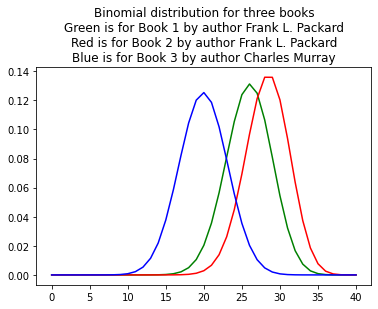

In [135]:
n = 40
x = np.arange(0,n+1)

binomial_pmf1 = binom.pmf(x, n, probability1)
binomial_pmf2 = binom.pmf(x, n, probability2)
binomial_pmf3 = binom.pmf(x, n, probability3)

plt.plot(x, binomial_pmf1, color='green')
plt.plot(x, binomial_pmf2, color='red')
plt.plot(x, binomial_pmf3, color='blue')
plt.title("Binomial distribution for three books\nGreen is for Book 1 by author Frank L. Packard\nRed is for Book 2 by author Frank L. Packard\nBlue is for Book 3 by author Charles Murray")

We can see that, for the same three books, the binomial distribution for the word "said" are different.